In [2]:
from scipy.stats import chisquare
from scipy import stats
import urllib.request
import string
import requests
from bs4 import BeautifulSoup
import pandas as pd
import multiprocessing
import gensim
import sys
# import spacy
# nlp=spacy.load('en')
# nlp = spacy.load('en_coref_sm')  
import seaborn as sns
from nltk.tokenize import WordPunctTokenizer
tknzr = WordPunctTokenizer()
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from scipy import spatial
from collections import Counter
import numpy as np
from collections import defaultdict
from pprint import pprint
from gensim import corpora
import re
import logging
import requests
import urllib 
import re
import sys
import zipfile
from glob import glob
import statsmodels.api as sm
import scipy
import scipy.stats as ss
from scipy.signal import savgol_filter
import random
# np.set_printoptions(precision=4)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

import matplotlib.pyplot as plt
%matplotlib inline
import bezier

from sklearn import metrics
from sklearn.cluster import KMeans
# from the demo
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.corpus import names
from scipy.stats import norm  
from statsmodels.tsa.stattools  import   grangercausalitytests
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
def flushPrint(s):
    sys.stdout.write('\r')
    sys.stdout.write('%s' % s)
    sys.stdout.flush()

In [4]:
def sig(x):
    if 0.01<x<=0.05:
        return '*'
    if 0.001<x<=0.01:
        return '**'
    if x<0.001:
        return '***'
    if x>0.05:
        return 'ns'

In [5]:
def normalization(x):
    x=np.array(x)
    return (x-np.min(x))/(np.max(x)-np.min(x))

In [6]:
def normalized(x):
    x= np.array(x)
    return (x-np.mean(x))/np.std(x)

In [7]:
def gender (x,y):
    v,p=stats.ttest_ind(x,y)
    print(p)  
    a=pd.DataFrame()
    a['K']=x
    a['gender']='male'
    b=pd.DataFrame()
    b['K']=y
    b['gender']='female'   
    a=a.append(b)
    return a

In [23]:
short_movie=pd.read_csv('./result/data/short_movie.csv')
short_movie=short_movie.dropna(axis=0,how='any',subset=['trend_m','trend_f'])

In [24]:
long_movie=pd.read_csv('./result/data/long_movie.csv')
long_movie=long_movie.dropna(axis=0,how='any',subset=['trend_m','trend_f'])

In [34]:
book=pd.read_csv('./result/data/book.csv')
book=book.dropna(axis=0,how='any',subset=['trend_m','trend_f'])

In [35]:
len(book)

7220

### Figure 4 - all positive slope 

4.162744986760039e-15
2.7385698414849967e-05


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


1.1417219703988404e-65


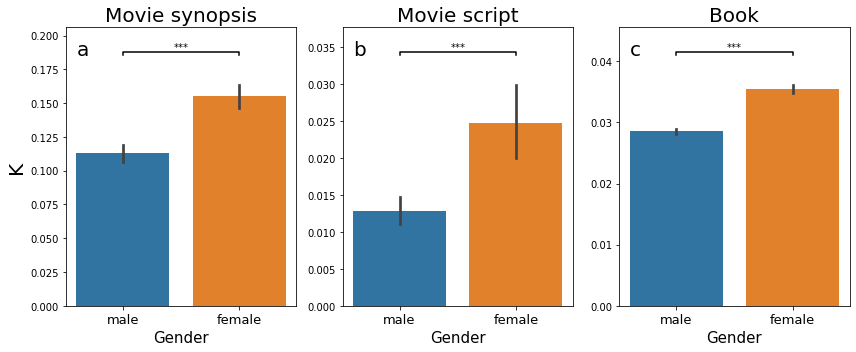

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:86: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


4.162744986760039e-15
2.7385698414849967e-05


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


1.1417219703988404e-65


In [ ]:
fig = fig = plt.figure(figsize=(12,5),facecolor = 'white')
ax=fig.add_subplot(1,3,1)
a=gender(short_movie['trend_m'].values,short_movie['trend_f'].values)
sns.barplot(x='gender',y='K',data = a,palette=None)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel('K',fontsize=20)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'a',fontsize=20)
# plt.text(-0.4,0.25,'a',fontsize=15)
# x1, x2 = 0, 1   
# y, h, col = 0.25 , 0.01, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
plt.title('Movie synopsis',fontsize=20)
ax=fig.add_subplot(1,3,2)
a=gender(long_movie['trend_m'].values,long_movie['trend_f'].values)
sns.barplot(x='gender',y='K',data = a)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'b',fontsize=20)
# plt.text(-0.4,0.029,'b',fontsize=15)
# x1, x2 = 0, 1   
# y, h, col = 0.029 , 0.001, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
plt.title('Movie script',fontsize=20)
ax=fig.add_subplot(1,3,3)
a=gender(book['trend_m'].values,book['trend_f'].values)
sns.barplot(x='gender',y='K',data = a)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
# plt.text(-0.4,0.032,'c',fontsize=15)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'c',fontsize=20)
# x1, x2 = 0, 1   
# y, h, col = 0.032 , 0.001, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
plt.title('Book',fontsize=20)
plt.tight_layout()
plt.savefig('./picture/figure3.eps',dpi=300)
plt.show()
plt.figure(figsize=(12,5),facecolor = 'white')
ax=fig.add_subplot(1,3,1)
a=gender(short_movie['trend_m'].values,short_movie['trend_f'].values)
sns.barplot(x='gender',y='K',data = a,palette=None)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel('K',fontsize=20)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'a',fontsize=20)
# plt.text(-0.4,0.25,'a',fontsize=15)
# x1, x2 = 0, 1   
# y, h, col = 0.25 , 0.01, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
plt.title('Movie synopsis',fontsize=20)
ax=fig.add_subplot(1,3,2)
a=gender(long_movie['trend_m'].values,long_movie['trend_f'].values)
sns.barplot(x='gender',y='K',data = a)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'b',fontsize=20)
# plt.text(-0.4,0.029,'b',fontsize=15)
# x1, x2 = 0, 1   
# y, h, col = 0.029 , 0.001, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
plt.title('Movie script',fontsize=20)
ax=fig.add_subplot(1,3,3)
a=gender(book['trend_m'].values,book['trend_f'].values)
sns.barplot(x='gender',y='K',data = a)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
# plt.text(-0.4,0.032,'c',fontsize=15)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'c',fontsize=20)
# x1, x2 = 0, 1   
# y, h, col = 0.032 , 0.001, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
plt.title('Book',fontsize=20)
plt.tight_layout()
plt.savefig('./picture/figure3.eps',dpi=300)
plt.show()

### S3Figure - all negative slope

In [26]:
for i in np.arange(1,10,1):
    short_movie['f_k_'+str(i)]=short_movie['f_k_'+str(i)].apply(lambda x:eval(x))
    short_movie['m_k_'+str(i)]=short_movie['m_k_'+str(i)].apply(lambda x:eval(x))

11395
2589


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


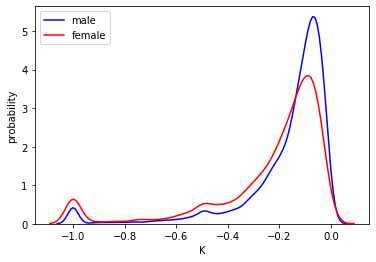

21360
2391


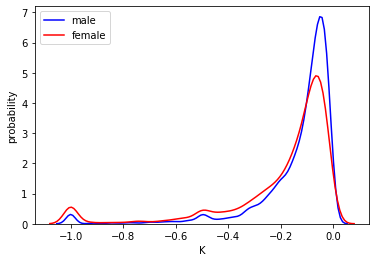

31284
2259


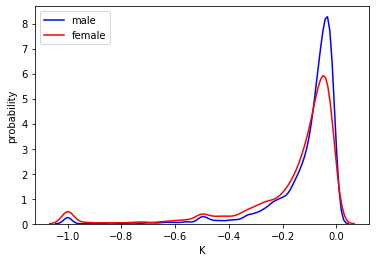

41278
2088


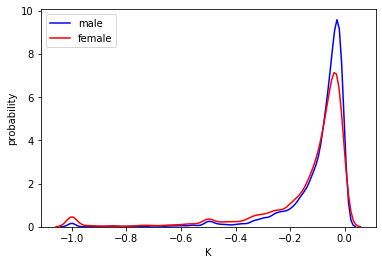

51259
1950


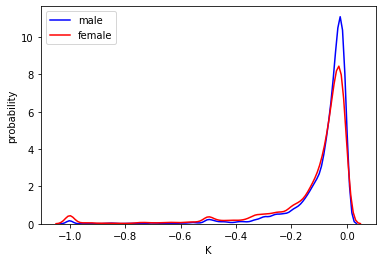

61220
1849


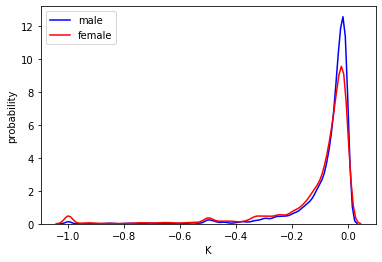

71185
1762


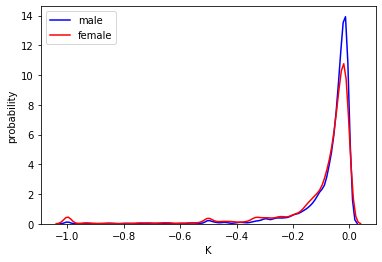

81165
1674


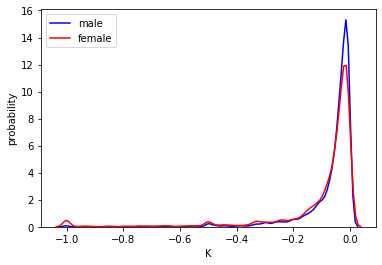

91160
1591


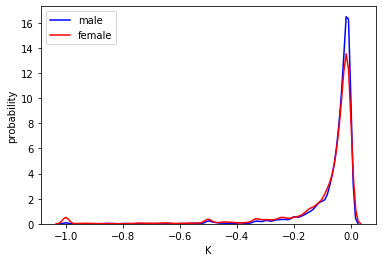

In [27]:
for i in np.arange(1,10,1):
    flushPrint(i)
#     short_movie['f_k_'+str(i)]=short_movie['f_k_'+str(i)].apply(lambda x:eval(x))
#     short_movie['m_k_'+str(i)]=short_movie['m_k_'+str(i)].apply(lambda x:eval(x))
    IMDB1=short_movie.dropna(axis=0,how='any',subset=['m_k_'+str(i),'f_k_'+str(i)])
#     IMDB1['trend_f']=IMDB1['f_k_'+str(i)].apply(lambda x:np.median([i[0] for i in x]))
#     IMDB1['trend_m']=IMDB1['m_k_'+str(i)].apply(lambda x:np.median([i[0] for i in x]))
    IMDB1['trend_f1']=IMDB1['f_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x if i[0]<0])/np.sum([i[1] for i in x if i[0]<0]))
    IMDB1['trend_m1']=IMDB1['m_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x if i[0]<0])/np.sum([i[1] for i in x if i[0]<0]))
#     IMDB1['trend_f1']=IMDB1['f_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x])/np.sum([i[1] for i in x]))
#     IMDB1['trend_m1']=IMDB1['m_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x])/np.sum([i[1] for i in x]))
    IMDB1['distance1']=IMDB1['trend_f1']-IMDB1['trend_m1']
    IMDB1['tp_l']=IMDB1['tp'].apply(lambda x: len(x))
    print(len(IMDB1[IMDB1['distance1']>0]))
    print(len(IMDB1[IMDB1['distance1']<0]))
    sns.distplot(list([i for i in IMDB1['trend_m1'].values]), hist=False, kde=True,color='blue',label='male')
    sns.distplot(list([i for i in IMDB1['trend_f1'].values]), hist=False, kde=True,color='red',label='female')
    # plt.plot([1,1],[0,1],'--')
    # plt.xlim(-1,2)
    plt.legend()
    plt.ylabel('probability')
    plt.xlabel('K')
    plt.show()

11395
2589


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


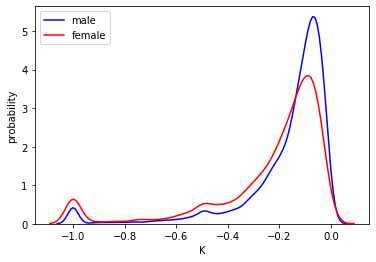

21360
2391


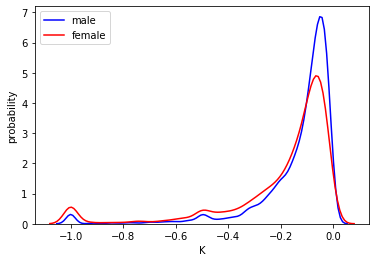

31284
2259


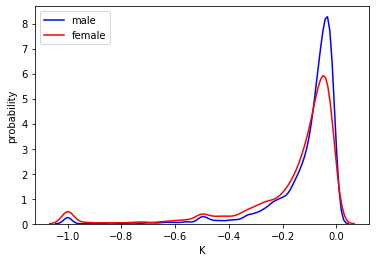

41278
2088


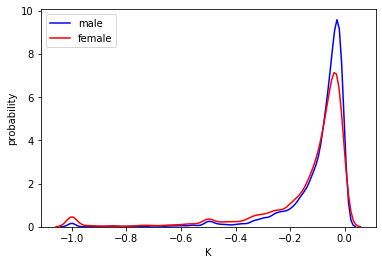

51259
1950


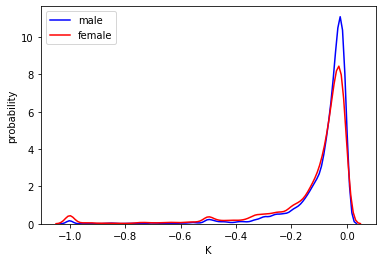

61220
1849


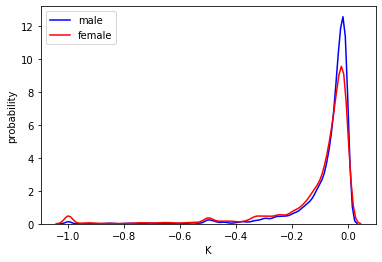

71185
1762


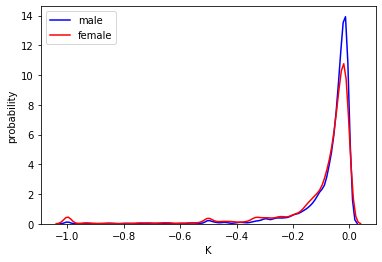

81165
1674


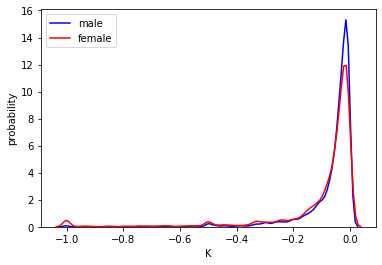

91160
1591


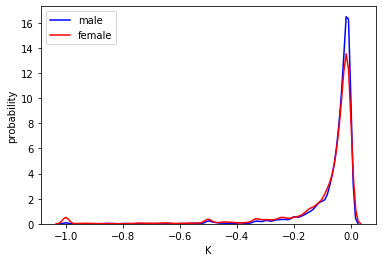

In [15]:
for i in np.arange(1,10,1):
    flushPrint(i)
#     short_movie['f_k_'+str(i)]=short_movie['f_k_'+str(i)].apply(lambda x:eval(x))
#     short_movie['m_k_'+str(i)]=short_movie['m_k_'+str(i)].apply(lambda x:eval(x))
    IMDB1=short_movie.dropna(axis=0,how='any',subset=['m_k_'+str(i),'f_k_'+str(i)])
#     IMDB1['trend_f']=IMDB1['f_k_'+str(i)].apply(lambda x:np.median([i[0] for i in x]))
#     IMDB1['trend_m']=IMDB1['m_k_'+str(i)].apply(lambda x:np.median([i[0] for i in x]))
    IMDB1['trend_f1']=IMDB1['f_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x if i[0]<0])/np.sum([i[1] for i in x if i[0]<0]))
    IMDB1['trend_m1']=IMDB1['m_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x if i[0]<0])/np.sum([i[1] for i in x if i[0]<0]))
#     IMDB1['trend_f1']=IMDB1['f_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x])/np.sum([i[1] for i in x]))
#     IMDB1['trend_m1']=IMDB1['m_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x])/np.sum([i[1] for i in x]))
    IMDB1['distance1']=IMDB1['trend_f1']-IMDB1['trend_m1']
    IMDB1['tp_l']=IMDB1['tp'].apply(lambda x: len(x))
    print(len(IMDB1[IMDB1['distance1']>0]))
    print(len(IMDB1[IMDB1['distance1']<0]))
    sns.distplot(list([i for i in IMDB1['trend_m1'].values]), hist=False, kde=True,color='blue',label='male')
    sns.distplot(list([i for i in IMDB1['trend_f1'].values]), hist=False, kde=True,color='red',label='female')
    # plt.plot([1,1],[0,1],'--')
    # plt.xlim(-1,2)
    plt.legend()
    plt.ylabel('probability')
    plt.xlabel('K')
    plt.show()

In [16]:
v,p=stats.ttest_ind([i for i in IMDB1['trend_m'].values], [i for i in IMDB1['trend_f'].values])
p

3.4916866659867057e-34

In [17]:
for i in np.arange(1,10,1):
    long_movie['f_k_'+str(i)]=long_movie['f_k_'+str(i)].apply(lambda x:eval(x))
    long_movie['m_k_'+str(i)]=long_movie['m_k_'+str(i)].apply(lambda x:eval(x))

1243
565


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


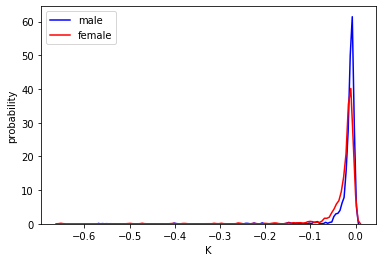

2248
559


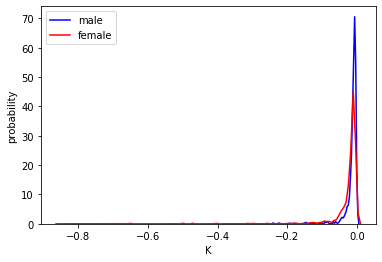

3256
545


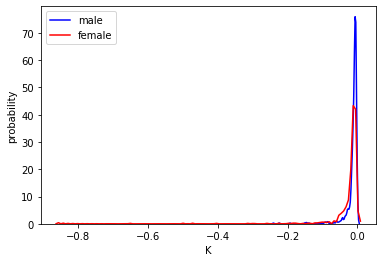

4260
536


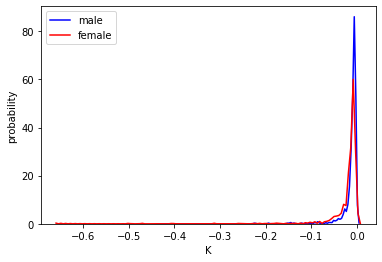

5252
542


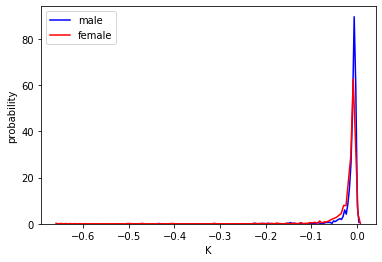

6256
534


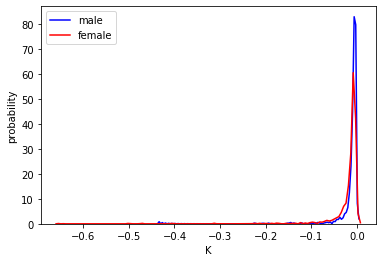

7261
524


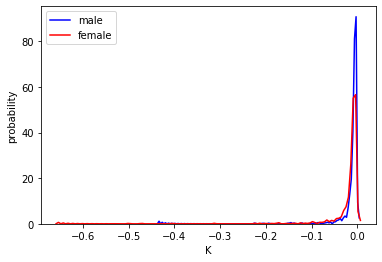

8264
520


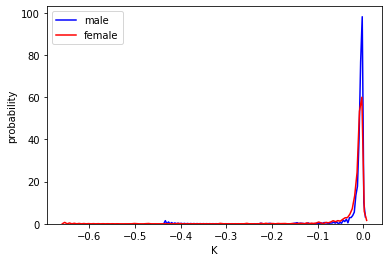

9259
525


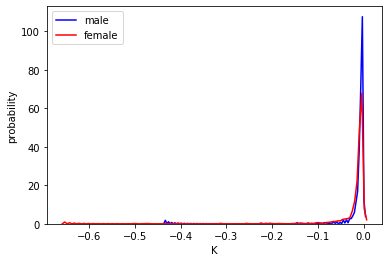

In [18]:
for i in np.arange(1,10,1):
    flushPrint(i)
#     short_movie['f_k_'+str(i)]=short_movie['f_k_'+str(i)].apply(lambda x:eval(x))
#     short_movie['m_k_'+str(i)]=short_movie['m_k_'+str(i)].apply(lambda x:eval(x))
    long_movie1=long_movie.dropna(axis=0,how='any',subset=['m_k_'+str(i),'f_k_'+str(i)])
#     IMDB1['trend_f']=IMDB1['f_k_'+str(i)].apply(lambda x:np.median([i[0] for i in x]))
#     IMDB1['trend_m']=IMDB1['m_k_'+str(i)].apply(lambda x:np.median([i[0] for i in x]))
    long_movie1['trend_f1']=long_movie1['f_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x if i[0]<0])/np.sum([i[1] for i in x if i[0]<0]))
    long_movie1['trend_m1']=long_movie1['m_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x if i[0]<0])/np.sum([i[1] for i in x if i[0]<0]))
#     IMDB1['trend_f1']=IMDB1['f_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x])/np.sum([i[1] for i in x]))
#     IMDB1['trend_m1']=IMDB1['m_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x])/np.sum([i[1] for i in x]))
    long_movie1['distance1']=long_movie1['trend_f1']-long_movie1['trend_m1']
    long_movie1['tp_l']=long_movie1['tp'].apply(lambda x: len(x))
    print(len(long_movie1[long_movie1['distance1']>0]))
    print(len(long_movie1[long_movie1['distance1']<0]))
    sns.distplot(list([i for i in long_movie1['trend_m1'].values]), hist=False, kde=True,color='blue',label='male')
    sns.distplot(list([i for i in long_movie1['trend_f1'].values]), hist=False, kde=True,color='red',label='female')
    # plt.plot([1,1],[0,1],'--')
    # plt.xlim(-1,2)
    plt.legend()
    plt.ylabel('probability')
    plt.xlabel('K')
    plt.show()

In [19]:
v,p=stats.ttest_ind([i for i in long_movie1['trend_m'].values], [i for i in long_movie1['trend_f'].values])
p

2.7385698414849967e-05

In [35]:
for i in np.arange(1,10,1):
    book['f_k_'+str(i)]=book['f_k_'+str(i)].apply(lambda x:eval(x))
    book['m_k_'+str(i)]=book['m_k_'+str(i)].apply(lambda x:eval(x))

11487
1734


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


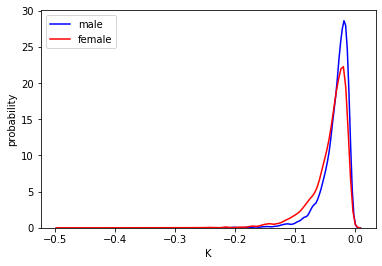

21574
1647


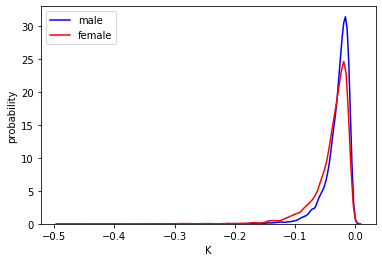

31650
1570


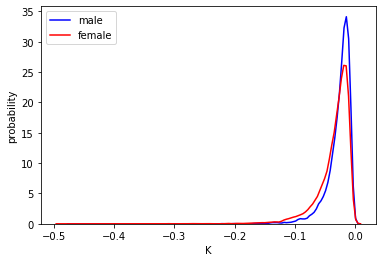

41715
1504


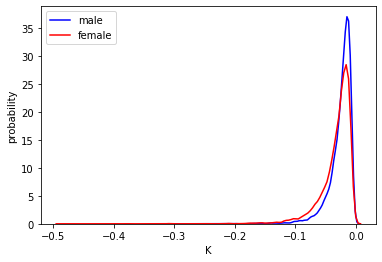

51792
1422


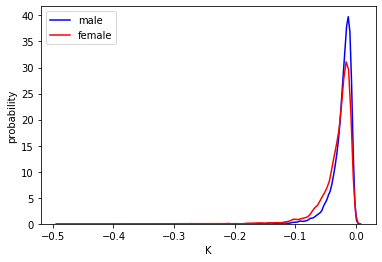

61857
1358


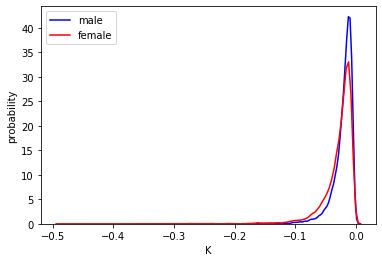

71926
1287


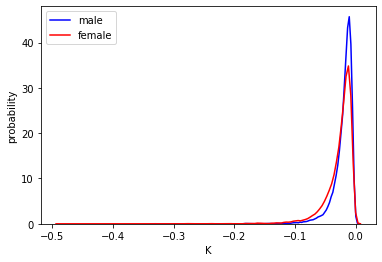

81978
1231


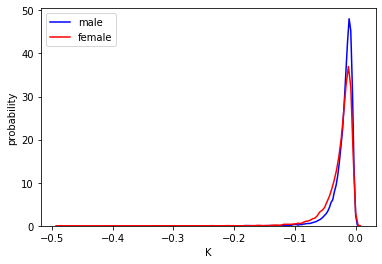

92027
1180


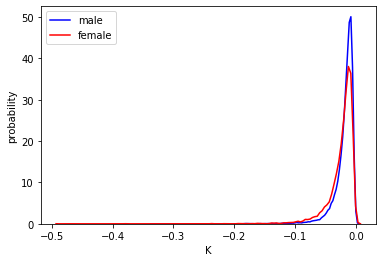

In [21]:
for i in np.arange(1,10,1):
    flushPrint(i)
#     short_movie['f_k_'+str(i)]=short_movie['f_k_'+str(i)].apply(lambda x:eval(x))
#     short_movie['m_k_'+str(i)]=short_movie['m_k_'+str(i)].apply(lambda x:eval(x))
    book1=book.dropna(axis=0,how='any',subset=['m_k_'+str(i),'f_k_'+str(i)])
#     IMDB1['trend_f']=IMDB1['f_k_'+str(i)].apply(lambda x:np.median([i[0] for i in x]))
#     IMDB1['trend_m']=IMDB1['m_k_'+str(i)].apply(lambda x:np.median([i[0] for i in x]))
    book1['trend_f1']=book1['f_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x if i[0]<0])/np.sum([i[1] for i in x if i[0]<0]))
    book1['trend_m1']=book1['m_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x if i[0]<0])/np.sum([i[1] for i in x if i[0]<0]))
#     IMDB1['trend_f1']=IMDB1['f_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x])/np.sum([i[1] for i in x]))
#     IMDB1['trend_m1']=IMDB1['m_k_'+str(i)].apply(lambda x:np.sum([i[0]*i[1] for i in x])/np.sum([i[1] for i in x]))
    book1['distance1']=book1['trend_f1']-IMDB1['trend_m1']
    book1['tp_l']=book1['tp'].apply(lambda x: len(x))
    print(len(book1[book1['distance1']>0]))
    print(len(book1[book1['distance1']<0]))
    sns.distplot(list([i for i in book1['trend_m1'].values]), hist=False, kde=True,color='blue',label='male')
    sns.distplot(list([i for i in book1['trend_f1'].values]), hist=False, kde=True,color='red',label='female')
    # plt.plot([1,1],[0,1],'--')
    # plt.xlim(-1,2)
    plt.legend()
    plt.ylabel('probability')
    plt.xlabel('K')
    plt.show()

In [22]:
book1=book1.dropna(axis=0,subset=['trend_m1','trend_f1'])

In [23]:
v,p=stats.ttest_ind([i for i in book1['trend_m1'].values], [i for i in book1['trend_f1'].values])
p

7.069216633088351e-62

nan
nan


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


7.069216633088351e-62


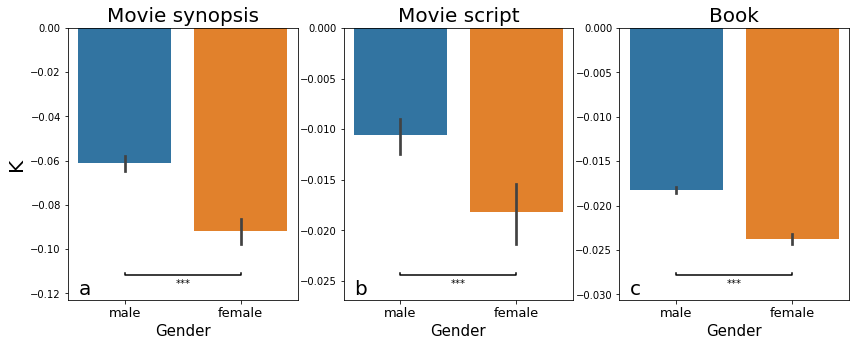

In [24]:
fig = plt.figure(figsize=(14,5))
ax=fig.add_subplot(1,3,1)
a=gender(IMDB1['trend_m1'].values,IMDB1['trend_f1'].values)
sns.barplot(x='gender',y='K',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel('K',fontsize=20)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([ax.get_ylim()[0]*1.2,0])
x1, x2 = 0, 1  
b=ax.get_ylim()[1]-(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y-h, y-h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y-6*h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.02
plt.text(-0.4,b,'a',fontsize=20)
# plt.text(-0.4,0,'a',fontsize=15)
# x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
# y, h, col = IMDB1['trend_f1'].mean()-0.01 , -0.0005, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
plt.title('Movie synopsis',fontsize=20)

ax=fig.add_subplot(1,3,2)
a=gender(long_movie1['trend_m1'].values,long_movie1['trend_f1'].values)
sns.barplot(x='gender',y='K',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([ax.get_ylim()[0]*1.2,0])
x1, x2 = 0, 1  
b=ax.get_ylim()[1]-(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y-h, y-h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y-6*h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.02
plt.text(-0.4,b,'b',fontsize=20)
# plt.text(-0.4,0,'b',fontsize=15)
# x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
# y, h, col = long_movie1['trend_f1'].mean()-0.01 , -0.0005, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
plt.title('Movie script',fontsize=20)

ax=fig.add_subplot(1,3,3)
a=gender(book1['trend_m1'].values,book1['trend_f1'].values)
sns.barplot(x='gender',y='K',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([ax.get_ylim()[0]*1.2,0])
x1, x2 = 0, 1  
b=ax.get_ylim()[1]-(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y-h, y-h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y-6*h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.02
plt.text(-0.4,b,'c',fontsize=20)
# plt.text(-0.4,0,'c',fontsize=15)
# x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
# y, h, col = book1['trend_f1'].mean()-0.01 , -0.0005, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "nan", ha='center', va='bottom', color=col)
plt.title('Book',fontsize=20)
plt.savefig('./picture/figure10.eps',dpi=300)
plt.show()

### S1Figure - all emotion trend

In [25]:
short_movie['emotion']=short_movie['emotion'].apply(lambda x: eval(x))
short_movie['female_a']=short_movie['female_a'].apply(lambda x: eval(x))
short_movie['male_a']=short_movie['male_a'].apply(lambda x: eval(x))

short_movie['e_f']=short_movie.apply(lambda row: [row.emotion[i] for i in row.female_a],axis=1)
short_movie['e_m']=short_movie.apply(lambda row: [row.emotion[i] for i in row.male_a],axis=1)

short_movie['e_f_m']=short_movie['e_f'].apply(lambda x: np.mean(x))
short_movie['e_m_m']=short_movie['e_m'].apply(lambda x: np.mean(x))

In [26]:
v,p=stats.ttest_ind([i for i in short_movie['e_m_m'].values], [i for i in short_movie['e_f_m'].values])
p

1.1349707787726642e-23

In [27]:
long_movie['emotion']=long_movie['emotion'].apply(lambda x: eval(x))
long_movie['female_a']=long_movie['female_a'].apply(lambda x: eval(x))
long_movie['male_a']=long_movie['male_a'].apply(lambda x: eval(x))

long_movie['e_f']=long_movie.apply(lambda row: [row.emotion[i] for i in row.female_a],axis=1)
long_movie['e_m']=long_movie.apply(lambda row: [row.emotion[i] for i in row.male_a],axis=1)

long_movie['e_f_m']=long_movie['e_f'].apply(lambda x: np.mean(x))
long_movie['e_m_m']=long_movie['e_m'].apply(lambda x: np.mean(x))

In [28]:
v,p=stats.ttest_ind([i for i in long_movie['e_m_m'].values], [i for i in long_movie['e_f_m'].values])
p

0.0003685545467937573

In [29]:
book['emotion']=book['emotion'].apply(lambda x: eval(x))
book['female_a']=book['female_a'].apply(lambda x: eval(x))
book['male_a']=book['male_a'].apply(lambda x: eval(x))

book['e_f']=book.apply(lambda row: [row.emotion[i] for i in row.female_a],axis=1)
book['e_m']=book.apply(lambda row: [row.emotion[i] for i in row.male_a],axis=1)

book['e_f_m']=book['e_f'].apply(lambda x: np.mean(x))
book['e_m_m']=book['e_m'].apply(lambda x: np.mean(x))

In [30]:
v,p=stats.ttest_ind([i for i in book['e_m_m'].values], [i for i in book['e_f_m'].values])
p

4.794516315487249e-13

1.1349707787726642e-23


/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


0.0003685545467937573
4.794516315487249e-13


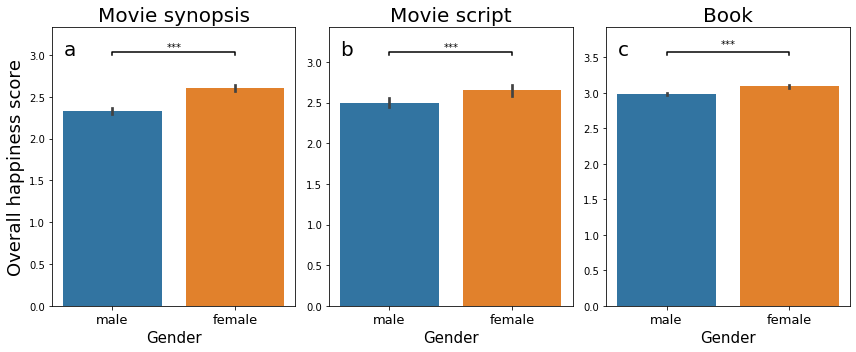

In [31]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,3,1)
a=gender(short_movie['e_m_m'].values,short_movie['e_f_m'].values)
sns.barplot(x='gender',y='K',data = a)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel('Overall happiness score',fontsize=18)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'a',fontsize=20)
# plt.text(-0.4,2.6,'a',fontsize=15)
# x1, x2 = 0, 1   
# y, h, col = short_movie['e_f_m'].mean()-0.01 , 0.1, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
plt.title('Movie synopsis',fontsize=20)
ax=fig.add_subplot(1,3,2)
a=gender(long_movie['e_m_m'].values,long_movie['e_f_m'].values)
sns.barplot(x='gender',y='K',data = a)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'b',fontsize=20)
# plt.text(-0.4,2.6,'b',fontsize=15)
# x1, x2 = 0, 1   
# y, h, col = long_movie['e_f_m'].mean()-0.01 , 0.1, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
plt.title('Movie script',fontsize=20)
ax=fig.add_subplot(1,3,3)
a=gender(book['e_m_m'].values,book['e_f_m'].values)
sns.barplot(x='gender',y='K',data = a)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+2*h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'c',fontsize=20)
# plt.text(-0.4,1.4,'c',fontsize=15)
# x1, x2 = 0, 1   
# y, h, col = book['e_f_m'].mean()-0.01 , 0.1, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "nan", ha='center', va='bottom', color=col)
plt.title('Book',fontsize=20)
plt.tight_layout()
plt.savefig('./picture/figure11.eps',dpi=300)
plt.show()

### S2 - female-all encounter and not encounter

In [13]:
short_movie['emotion']=short_movie['emotion'].apply(lambda x: eval(x))
short_movie['female_a']=short_movie['female_a'].apply(lambda x: eval(x))
short_movie['tp']=short_movie['tp'].apply(lambda x: eval(x))

In [14]:
short_movie['female_no']=short_movie.apply(lambda row:[i for i in \
                         row.female_a if i not in row.tp],axis=1)
short_movie['female_no']=short_movie.apply(lambda row: [row.emotion[i] for i in row.female_no],axis=1)
short_movie['female_yes']=short_movie.apply(lambda row: [row.emotion[i] for i in row.tp],axis=1)
short_movie['female_no']=short_movie['female_no'].apply(lambda x: np.mean(x))
short_movie['female_yes']=short_movie['female_yes'].apply(lambda x: np.mean(x))

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [15]:
short_movie['female_no']=short_movie['female_no'].fillna(0)

In [16]:
v,p=stats.ttest_ind([i for i in short_movie['female_no'].values], [i for i in short_movie['female_yes'].values])
p

8.008879717509002e-79

In [17]:
long_movie['emotion']=long_movie['emotion'].apply(lambda x: eval(x))
long_movie['female_a']=long_movie['female_a'].apply(lambda x: eval(x))
long_movie['tp']=long_movie['tp'].apply(lambda x: eval(x))

In [18]:
long_movie['female_no']=long_movie.apply(lambda row:[i for i in \
                         row.female_a if i not in row.tp],axis=1)
long_movie['female_no']=long_movie.apply(lambda row: [row.emotion[i] for i in row.female_no],axis=1)
long_movie['female_yes']=long_movie.apply(lambda row: [row.emotion[i] for i in row.tp],axis=1)
long_movie['female_no']=long_movie['female_no'].apply(lambda x: np.mean(x))
long_movie['female_yes']=long_movie['female_yes'].apply(lambda x: np.mean(x))

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [19]:
long_movie['female_no']=long_movie['female_no'].fillna(0)

In [20]:
v,p=stats.ttest_ind([i for i in long_movie['female_no'].values], [i for i in long_movie['female_yes'].values])
p

1.913491947976971e-25

In [21]:
book['emotion']=book['emotion'].apply(lambda x: eval(x))
book['female_a']=book['female_a'].apply(lambda x: eval(x))
book['tp']=book['tp'].apply(lambda x: eval(x))

In [23]:
book['female_no']=book.apply(lambda row:[i for i in \
                         row.female_a if i not in row.tp],axis=1)
book['female_no']=book.apply(lambda row: [row.emotion[i] for i in row.female_no],axis=1)
book['female_yes']=book.apply(lambda row: [row.emotion[i] for i in row.tp],axis=1)
book['female_no']=book['female_no'].apply(lambda x: np.mean(x))
book['female_yes']=book['female_yes'].apply(lambda x: np.mean(x))

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


In [24]:
book['female_no']=book['female_no'].fillna(0)

In [25]:
def gender (x,y):
    a=pd.DataFrame()
    a['K']=x
    a['gender']='no'
    b=pd.DataFrame()
    b['K']=y
    b['gender']='yes'
    a=a.append(b)
    return a

In [26]:
book['female_no']=book['female_no'].fillna(0)

In [27]:
v,p=stats.ttest_ind([i for i in book['female_no'].values], [i for i in book['female_yes'].values])
p

3.165650475962627e-35

### Figure7 - verb

In [75]:
def tp_eval(x):
    try:
        if type(x)==str:
            return [eval(i) for i in x.replace('\n','').replace('[','').replace(']','').split(' ') if i!='']
        else:
            return [i for i in x.replace('\n','').replace('[','').replace(']','').split(' ') if i!='']
    except:
        return x

In [76]:
def eval_(x):
    try:
        return eval(x)
    except:
        return np.nan
        pass

In [77]:
def ev(x,y):
    match = re.findall('\[.*?\]', x[1:-1])
    match =[re.findall(r'[[](.*?)[]]', j)[0].split(', ') for j in match]
    a=[]
#     [a.extend(q) for k,q in enumerate(match) if k in y]
    [a.extend(q) for k,q in enumerate(match)]
    a=[j for j in a if len(j)>1]
    return a

In [78]:
def ev(x,y):
    match = re.findall('\[.*?\]', x[1:-1])
    match =[re.findall(r'[[](.*?)[]]', j)[0].split(', ') for j in match]
    a=[]
    [a.extend(q) for k,q in enumerate(match) if k in y]
    a=[j for j in a if len(j)>1]
    return a

In [79]:
def ev1(x):
    match = re.findall('\[.*?\]', x[1:-1])
    match =[re.findall(r'[[](.*?)[]]', j)[0].split(', ') for j in match]
    a=[]
    [a.extend(q) for k,q in enumerate(match)]
    a=[j for j in a if len(j)>1]
    return a

In [80]:
short_movie['tp']=short_movie['tp'].apply(lambda x: eval_(x))
short_movie['up']=short_movie['up'].apply(lambda x: eval_(x))

In [81]:
short_movie['m_verbs1']=short_movie.apply(lambda row: ev(row.m_verbs,row.up), axis=1)
short_movie['f_verbs1']=short_movie.apply(lambda row: ev(row.f_verbs,row.up), axis=1)

In [22]:
short_movie['m_verbs_p']=short_movie.apply(lambda row: len(row.m_verbs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)
short_movie['f_verbs_p']=short_movie.apply(lambda row: len(row.f_verbs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)

In [23]:
short_movie=short_movie.dropna(axis=0,how='any',subset=['m_verbs_p','f_verbs_p'])

In [24]:
long_movie['tp']=long_movie['tp'].apply(lambda x: eval_(x))
long_movie['up']=long_movie['up'].apply(lambda x: eval_(x))

In [25]:
long_movie['m_verbs1']=long_movie.apply(lambda row: ev(row.m_verbs,row.up), axis=1)
long_movie['f_verbs1']=long_movie.apply(lambda row: ev(row.f_verbs,row.up), axis=1)

In [26]:
long_movie['m_verbs_p']=long_movie.apply(lambda row: len(row.m_verbs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)
long_movie['f_verbs_p']=long_movie.apply(lambda row: len(row.f_verbs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)

In [104]:
book['tp']=book['tp'].apply(lambda x: eval_(x))
book['up']=book['up'].apply(lambda x: eval_(x))

In [105]:
book['m_verbs1']=book.apply(lambda row: ev(row.m_verbs,row.up), axis=1)
book['f_verbs1']=book.apply(lambda row: ev(row.f_verbs,row.up), axis=1)

In [106]:
book['m_verbs_p']=book.apply(lambda row: len(row.m_verbs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)
book['f_verbs_p']=book.apply(lambda row: len(row.f_verbs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)

In [32]:
book=book.dropna(axis=0,how='any',subset=['m_verbs_p','f_verbs_p'])

In [33]:
v,p=stats.ttest_ind([i for i in book['m_verbs_p'].values], [i for i in book['f_verbs_p'].values])
p

0.0033320464435807433

In [34]:
def gender (x,y):
    a=pd.DataFrame()
    a['verbs_c']=x
    a['gender']='male'
    b=pd.DataFrame()
    b['verbs_c']=y
    b['gender']='female'
    a=a.append(b)
    return a

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


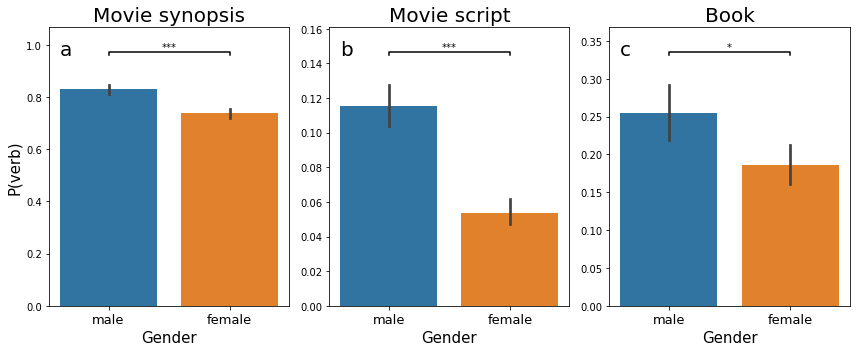

In [35]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,3,1)
a=gender(short_movie['m_verbs_p'].values,short_movie['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel('P(verb)',fontsize=15)
# plt.text(-0.4,0.9,'a',fontsize=15)
plt.title('Movie synopsis',fontsize=20)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'a',fontsize=20)
# x1, x2 = 0, 1   
# y, h, col = 0.9 , 0.01, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)

ax=fig.add_subplot(1,3,2)
a=gender(long_movie['m_verbs_p'].values,long_movie['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
# plt.text(-0.4,0.19,'b',fontsize=15)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'b',fontsize=20)
plt.title('Movie script',fontsize=20)
# x1, x2 = 0, 1   
# y, h, col = 0.19 , 0.01, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)

ax=fig.add_subplot(1,3,3)
a=gender(book['m_verbs_p'].values,book['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Book',fontsize=20)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "*", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'c',fontsize=20)
# plt.text(-0.4,0.33,'c',fontsize=15)
# x1, x2 = 0, 1   
# y, h, col = 0.33 , 0.01, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom', color=col)

plt.tight_layout()
plt.savefig('./picture/figure7_o.eps',dpi=300)
plt.show()

In [90]:
short_movie['m_verbs1']=short_movie.apply(lambda row: ev(row.m_verbs,row.up), axis=1)
short_movie['f_verbs1']=short_movie.apply(lambda row: ev(row.f_verbs,row.up), axis=1)

In [91]:
short_movie['m_verbs_p']=short_movie.apply(lambda row: len(row.m_verbs1)/row.len if row.len>0 else np.nan,axis=1)
short_movie['f_verbs_p']=short_movie.apply(lambda row: len(row.f_verbs1)/row.len if row.len>0 else np.nan,axis=1)

In [92]:
short_movie=short_movie.dropna(axis=0,how='any',subset=['m_verbs_p','f_verbs_p'])

In [93]:
long_movie['tp']=long_movie['tp'].apply(lambda x: eval_(x))
long_movie['up']=long_movie['up'].apply(lambda x: eval_(x))

In [94]:
long_movie['m_verbs1']=long_movie.apply(lambda row: ev(row.m_verbs,row.up), axis=1)
long_movie['f_verbs1']=long_movie.apply(lambda row: ev(row.f_verbs,row.up), axis=1)

In [95]:
long_movie['m_verbs_p']=long_movie.apply(lambda row: len(row.m_verbs1)/row.len if row.len>0 else np.nan,axis=1)
long_movie['f_verbs_p']=long_movie.apply(lambda row: len(row.f_verbs1)/row.len if row.len>0 else np.nan,axis=1)

In [96]:
long_movie=long_movie.dropna(axis=0,how='any',subset=['m_verbs_p','f_verbs_p'])

In [97]:
book['tp']=book['tp'].apply(lambda x: eval_(x))
book['up']=book['up'].apply(lambda x: eval_(x))

In [101]:
book['tp_f']=book['tp_f'].apply(lambda x: tp_eval(x))
book['tp_m']=book['tp_m'].apply(lambda x: tp_eval(x))

In [99]:
# book['m_verbs_p']=book.apply(lambda row: len(row.m_verbs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)
# book['f_verbs_p']=book.apply(lambda row: len(row.f_verbs1)/len(row.up) if len(row.up)>0 else np.nan,axis=1)

In [107]:
book['m_verbs_p']=book.apply(lambda row: len(row.m_verbs1)/row.len if row.len>0 else np.nan,axis=1)
book['f_verbs_p']=book.apply(lambda row: len(row.f_verbs1)/row.len if row.len>0 else np.nan,axis=1)

In [108]:
book=book.dropna(axis=0,how='any',subset=['m_verbs_p','f_verbs_p'])

In [109]:
v,p=stats.ttest_ind([i for i in book['m_verbs_p'].values], [i for i in book['f_verbs_p'].values])
p

0.14542464363529384

In [110]:
def gender (x,y):
    a=pd.DataFrame()
    a['verbs_c']=x
    a['gender']='male'
    b=pd.DataFrame()
    b['verbs_c']=y
    b['gender']='female'
    a=a.append(b)
    return a

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


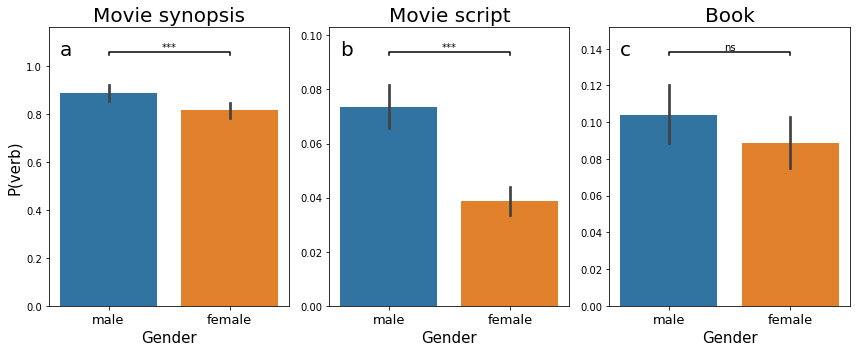

In [115]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,3,1)
a=gender(short_movie['m_verbs_p'].values,short_movie['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel('P(verb)',fontsize=15)
# plt.text(-0.4,0.9,'a',fontsize=15)
plt.title('Movie synopsis',fontsize=20)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'a',fontsize=20)
# x1, x2 = 0, 1   
# y, h, col = 0.9 , 0.01, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)

ax=fig.add_subplot(1,3,2)
a=gender(long_movie['m_verbs_p'].values,long_movie['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
# plt.text(-0.4,0.19,'b',fontsize=15)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'b',fontsize=20)
plt.title('Movie script',fontsize=20)
# x1, x2 = 0, 1   
# y, h, col = 0.19 , 0.01, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)

ax=fig.add_subplot(1,3,3)
a=gender(book['m_verbs_p'].values,book['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Book',fontsize=20)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "ns", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'c',fontsize=20)
# plt.text(-0.4,0.33,'c',fontsize=15)
# x1, x2 = 0, 1   
# y, h, col = 0.33 , 0.01, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom', color=col)

plt.tight_layout()
plt.savefig('./picture/figure7.eps',dpi=300)
plt.show()

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


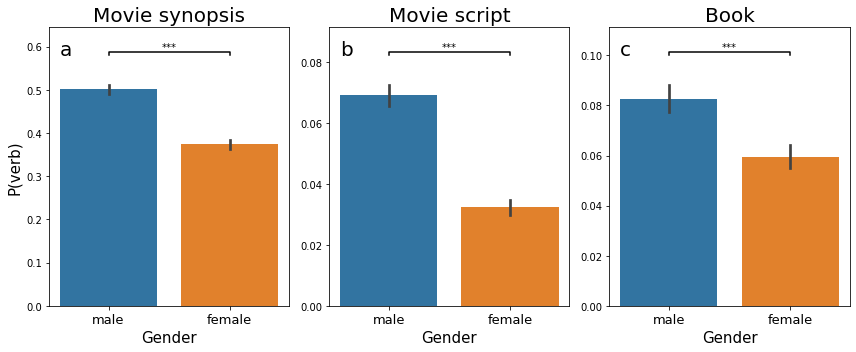

In [112]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,3,1)
a=gender(short_movie['m_verbs_p'].values,short_movie['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel('P(verb)',fontsize=15)
# plt.text(-0.4,0.9,'a',fontsize=15)
plt.title('Movie synopsis',fontsize=20)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'a',fontsize=20)
# x1, x2 = 0, 1   
# y, h, col = 0.9 , 0.01, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)

ax=fig.add_subplot(1,3,2)
a=gender(long_movie['m_verbs_p'].values,long_movie['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
# plt.text(-0.4,0.19,'b',fontsize=15)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'b',fontsize=20)
plt.title('Movie script',fontsize=20)
# x1, x2 = 0, 1   
# y, h, col = 0.19 , 0.01, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)

ax=fig.add_subplot(1,3,3)
a=gender(book['m_verbs_p'].values,book['f_verbs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Book',fontsize=20)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'c',fontsize=20)
# plt.text(-0.4,0.33,'c',fontsize=15)
# x1, x2 = 0, 1   
# y, h, col = 0.33 , 0.01, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom', color=col)

plt.tight_layout()
plt.savefig('./picture/figure7.eps',dpi=300)
plt.show()

In [113]:
short_movie['tp']=short_movie['tp'].apply(lambda x: eval_(x))
short_movie['up']=short_movie['up'].apply(lambda x: eval_(x))

In [114]:
short_movie['m_adjs1']=short_movie.apply(lambda row: ev(row.m_adjs,row.up), axis=1)
short_movie['f_adjs1']=short_movie.apply(lambda row: ev(row.f_adjs,row.up), axis=1)

In [115]:
short_movie['m_adjs_p']=short_movie.apply(lambda row: len(row.m_adjs1)/row.len if row.len>0 else np.nan,axis=1)
short_movie['f_adjs_p']=short_movie.apply(lambda row: len(row.f_adjs1)/row.len if row.len>0 else np.nan,axis=1)

In [116]:
short_movie=short_movie.dropna(axis=0,how='any',subset=['m_adjs_p','f_adjs_p'])

In [134]:
v,p=stats.ttest_ind([i for i in short_movie['m_adjs_p'].values], [i for i in short_movie['f_adjs_p'].values])
p

0.0006238565167230125

In [117]:
long_movie['m_adjs1']=long_movie.apply(lambda row: ev(row.m_adjs,row.up), axis=1)
long_movie['f_adjs1']=long_movie.apply(lambda row: ev(row.f_adjs,row.up), axis=1)

In [118]:
long_movie['m_adjs1']=long_movie.apply(lambda row: ev(row.m_adjs,row.up), axis=1)
long_movie['f_adjs1']=long_movie.apply(lambda row: ev(row.f_adjs,row.up), axis=1)

In [119]:
long_movie['m_adjs_p']=long_movie.apply(lambda row: len(row.m_adjs1)/row.len if row.len>0 else np.nan,axis=1)
long_movie['f_adjs_p']=long_movie.apply(lambda row: len(row.f_adjs1)/row.len if row.len>0 else np.nan,axis=1)

In [120]:
long_movie=long_movie.dropna(axis=0,how='any',subset=['m_adjs_p','f_adjs_p'])

In [133]:
v,p=stats.ttest_ind([i for i in long_movie['m_adjs_p'].values], [i for i in long_movie['f_adjs_p'].values])
p

2.099780557245123e-31

In [121]:
book['tp']=book['tp'].apply(lambda x: eval_(x))
book['up']=book['up'].apply(lambda x: eval_(x))

In [122]:
book['tp_f']=book['tp_f'].apply(lambda x: tp_eval(x))
book['tp_m']=book['tp_m'].apply(lambda x: tp_eval(x))

In [125]:
book['m_adjs1']=book.apply(lambda row: ev(row.m_adjs,row.up), axis=1)
book['f_adjs1']=book.apply(lambda row: ev(row.f_adjs,row.up), axis=1)

In [126]:
book['m_adjs_p']=book.apply(lambda row: len(row.m_adjs1)/row.len if row.len>0 else np.nan,axis=1)
book['f_adjs_p']=book.apply(lambda row: len(row.f_adjs1)/row.len if row.len>0 else np.nan,axis=1)

In [127]:
book=book.dropna(axis=0,how='any',subset=['m_adjs_p','f_adjs_p'])

In [129]:
v,p=stats.ttest_ind([i for i in book['m_adjs_p'].values], [i for i in book['f_adjs_p'].values])
p

0.0009327464599753031

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


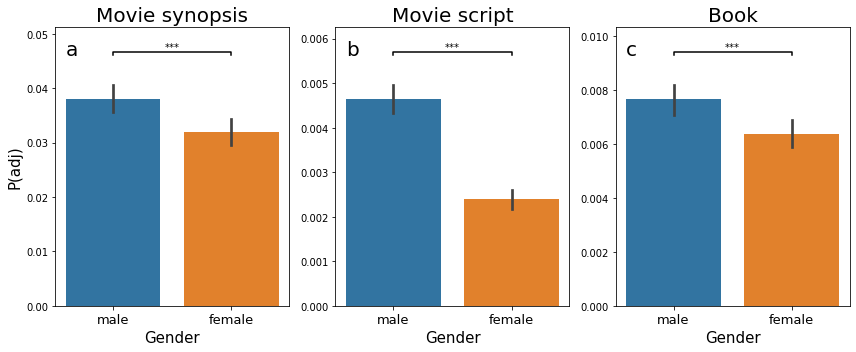

In [132]:
fig = plt.figure(figsize=(12,5))
ax=fig.add_subplot(1,3,1)
a=gender(short_movie['m_adjs_p'].values,short_movie['f_adjs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel('P(adj)',fontsize=15)
# plt.text(-0.4,0.9,'a',fontsize=15)
plt.title('Movie synopsis',fontsize=20)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'a',fontsize=20)
# x1, x2 = 0, 1   
# y, h, col = 0.9 , 0.01, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)

ax=fig.add_subplot(1,3,2)
a=gender(long_movie['m_adjs_p'].values,long_movie['f_adjs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
# plt.text(-0.4,0.19,'b',fontsize=15)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'b',fontsize=20)
plt.title('Movie script',fontsize=20)
# x1, x2 = 0, 1   
# y, h, col = 0.19 , 0.01, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)

ax=fig.add_subplot(1,3,3)
a=gender(book['m_adjs_p'].values,book['f_adjs_p'].values)
sns.barplot(x='gender',y='verbs_c',data = a)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel(None,fontsize=15)
plt.title('Book',fontsize=20)
ax.xaxis.set_tick_params(labelsize=13)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
x1, x2 = 0, 1  
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
y, h, col = b , (ax.get_ylim()[1]-ax.get_ylim()[0])/100, 'k'
plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
plt.text((x1+x2)*.5, y+h, "***", ha='center', va='bottom', color=col)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
plt.text(-0.4,b,'c',fontsize=20)
# plt.text(-0.4,0.33,'c',fontsize=15)
# x1, x2 = 0, 1   
# y, h, col = 0.33 , 0.01, 'k'
# plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
# plt.text((x1+x2)*.5, y+h, "**", ha='center', va='bottom', color=col)

plt.tight_layout()
plt.savefig('./picture/figure20.eps',dpi=300)
plt.show()

### S8Figure - genre

In [43]:
import copy
IMDB2 = copy.deepcopy(short_movie)
IMDB2['g_len']=IMDB2['genres'].apply(lambda x: len(x.split(',')))
df=IMDB2[IMDB2['g_len']==1]
df1=IMDB2[IMDB2['g_len']==2]
df1_1=copy.deepcopy(df1)
df1['genres']=df1['genres'].apply(lambda x: x.split(',')[0])
df1_1['genres']=df1_1['genres'].apply(lambda x: x.split(',')[1])
df2=IMDB2[IMDB2['g_len']==3]
df2_1=copy.deepcopy(df2)
df2_2=copy.deepcopy(df2)
df2['genres']=df2['genres'].apply(lambda x: x.split(',')[0])
df2_1['genres']=df2_1['genres'].apply(lambda x: x.split(',')[1])
df2_2['genres']=df2_2['genres'].apply(lambda x: x.split(',')[2])
data=pd.DataFrame()
data=data.append(df)
data=data.append(df1)
data=data.append(df1_1)
data=data.append(df2)
data=data.append(df2_1)
data=data.append(df2_2)
data=data.reset_index(drop=True)
data=data[data['genres']!='\\N']

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


In [44]:
def gender (x,y,z):
    a=pd.DataFrame()
    a['K']=x
    a['gender']='male'
    a['genres']=z
    b=pd.DataFrame()
    b['K']=y
    b['gender']='female'
    b['genres']=z
    a=a.append(b)
    return a

In [45]:
# sns.set(rc={
# #     "font.style":"normal",
# #             "axes.facecolor":bg_color,
# #             "figure.facecolor":bg_color,
# #             "text.color":"black",
# #             "xtick.color":"black",
# #             "ytick.color":"black",
# #             "axes.labelcolor":"black",
# #             "axes.grid":False,
#             'axes.labelsize':30,
#             'figure.figsize':(20.0, 10.0),
#             'xtick.labelsize':25,
#             'font.size':20,
#             'ytick.labelsize':20})

In [46]:
a=gender(data['trend_m'].values,data['trend_f'].values,data['genres'].values)

In [47]:
import copy
IMDB2 = copy.deepcopy(long_movie)
IMDB2['type']=IMDB2['type'].apply(lambda x: ','.join([i for i in x.split(',') if i!='nan']))
IMDB2['g_len']=IMDB2['type'].apply(lambda x: len(x.split(',')))

In [48]:
df=IMDB2[IMDB2['g_len']==1]
df1=IMDB2[IMDB2['g_len']==2]
df1_1=copy.deepcopy(df1)
df1['type']=df1['type'].apply(lambda x: x.split(',')[0])
df1_1['type']=df1_1['type'].apply(lambda x: x.split(',')[1])
df2=IMDB2[IMDB2['g_len']==3]
df2_1=copy.deepcopy(df2)
df2_2=copy.deepcopy(df2)
df2['type']=df2['type'].apply(lambda x: x.split(',')[0])
df2_1['type']=df2_1['type'].apply(lambda x: x.split(',')[1])
df2_2['type']=df2_2['type'].apply(lambda x: x.split(',')[2])
df3=IMDB2[IMDB2['g_len']==4]
df3_1=copy.deepcopy(df3)
df3_2=copy.deepcopy(df3)
df3_3=copy.deepcopy(df3)
df3['type']=df3['type'].apply(lambda x: x.split(',')[0])
df3_1['type']=df3_1['type'].apply(lambda x: x.split(',')[1])
df3_2['type']=df3_2['type'].apply(lambda x: x.split(',')[2])
df3_3['type']=df3_3['type'].apply(lambda x: x.split(',')[3])
df4=IMDB2[IMDB2['g_len']==5]
df4_1=copy.deepcopy(df4)
df4_2=copy.deepcopy(df4)
df4_3=copy.deepcopy(df4)
df4_4=copy.deepcopy(df4)
df4['type']=df4['type'].apply(lambda x: x.split(',')[0])
df4_1['type']=df4_1['type'].apply(lambda x: x.split(',')[1])
df4_2['type']=df4_2['type'].apply(lambda x: x.split(',')[2])
df4_3['type']=df4_3['type'].apply(lambda x: x.split(',')[3])
df4_4['type']=df4_4['type'].apply(lambda x: x.split(',')[4])
df5=IMDB2[IMDB2['g_len']==6]
df5_1=copy.deepcopy(df5)
df5_2=copy.deepcopy(df5)
df5_3=copy.deepcopy(df5)
df5_4=copy.deepcopy(df5)
df5_5=copy.deepcopy(df5)
df5['type']=df5['type'].apply(lambda x: x.split(',')[0])
df5_1['type']=df5_1['type'].apply(lambda x: x.split(',')[1])
df5_2['type']=df5_2['type'].apply(lambda x: x.split(',')[2])
df5_3['type']=df5_3['type'].apply(lambda x: x.split(',')[3])
df5_4['type']=df5_4['type'].apply(lambda x: x.split(',')[4])
df5_5['type']=df5_5['type'].apply(lambda x: x.split(',')[5])
data=pd.DataFrame()
data=data.append(df)
data=data.append(df1)
data=data.append(df1_1)
data=data.append(df2)
data=data.append(df2_1)
data=data.append(df2_2)
data=data.append(df3)
data=data.append(df3_1)
data=data.append(df3_2)
data=data.append(df3_3)
data=data.append(df4)
data=data.append(df4_1)
data=data.append(df4_2)
data=data.append(df4_3)
data=data.append(df4_4)
data=data.append(df5)
data=data.append(df5_1)
data=data.append(df5_2)
data=data.append(df5_3)
data=data.append(df5_4)
data=data.append(df5_5)
data=data.reset_index(drop=True)
data=data[data['type']!='nan']

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [49]:
a1=gender(data['trend_m'].values,data['trend_f'].values,data['type'].values)

In [50]:
book['genres']=book['loc_class'].apply(lambda x: [i[:1] for i in x.split('|') if i[0] in [str(chr(i)) for i in range(65,91)]])

In [51]:
import copy
IMDB2 = copy.deepcopy(book)
IMDB2['genres']=IMDB2['genres'].apply(lambda x: ','.join(x))
IMDB2['g_len']=IMDB2['genres'].apply(lambda x: len(x.split(',')))

In [52]:
df=IMDB2[IMDB2['g_len']==1]
df1=IMDB2[IMDB2['g_len']==2]
df1_1=copy.deepcopy(df1)
df1['genres']=df1['genres'].apply(lambda x: x.split(',')[0])
df1_1['genres']=df1_1['genres'].apply(lambda x: x.split(',')[1])
data=pd.DataFrame()
data=data.append(df)
data=data.append(df1)
data=data.append(df1_1)
data=data.reset_index(drop=True)
data=data[data['genres']!='\\N']

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [53]:
a2=gender(data['trend_m'].values,data['trend_f'].values,data['genres'].values)

In [54]:
diction=Counter(a1['genres'].values)
l=[i for i in diction if (diction[i]>10) & (i!='')]
a1=a1[a1['genres'].isin(l)]

In [55]:
diction=Counter(a2['genres'].values)
l=[i for i in diction if diction[i]>2]
a2=a2[a2['genres'].isin(l)]

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
2019-09-10 20:23:20,478 : WARNING : The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2019-09-10 20:23:20,478 : WARNING : The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2019-09-10 20:23:20,541 : WARNING : The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2019-09-10 20:23:20,542 : WARNING : The PostScript backend does not support transparency; partially transparent artists will be rendered opaqu

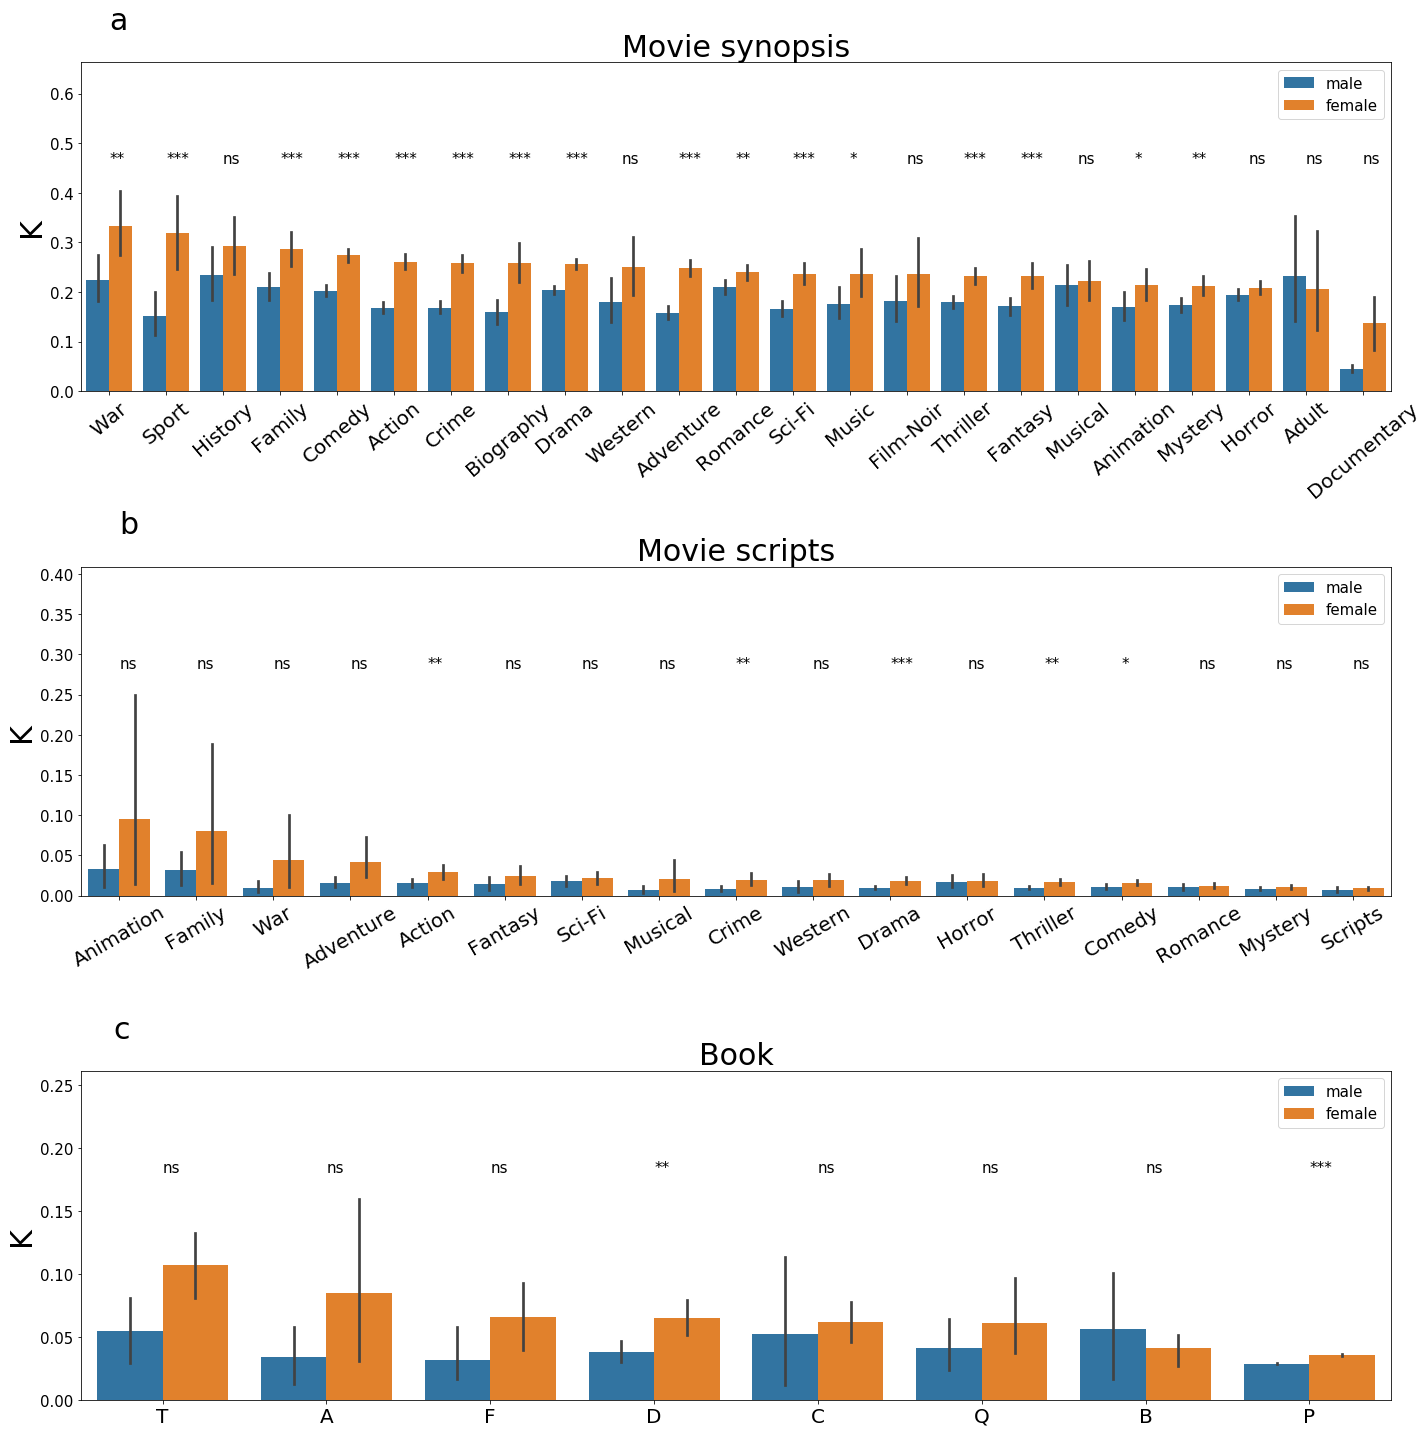

In [81]:
# sns.set_style("white")
f, axes = plt.subplots(3,1,figsize=(20, 20))
ax=axes[0]
c=a[a['gender']=='female'].groupby(['genres'])['K'].mean().keys()
d=a[a['gender']=='female'].groupby(['genres'])['K'].mean().values
e=[i[0] for i in sorted(list(zip(c,d)),key=lambda x: x[1],reverse=True)]
sns.catplot(x="genres", y="K", hue="gender", data=a,
                height=10,aspect=30/10, kind="bar", palette=None,order=e
            ,ax=ax)
style="whitegrid"
plt.setp(axes[0].get_xticklabels(),rotation=40) 
# ax.legend_.remove()


# ax.legend(bbox_to_anchor=(0.93, 0.5),fontsize=20)
ax.tick_params(axis="y", labelsize=15)
ax.xaxis.set_tick_params(labelsize=20)
ax.set_title('Movie synopsis',fontsize=30)
ax.set_xlabel(None)
ax.set_ylabel('K',fontsize=30)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
for n,i in enumerate(e):
    m=a[(a['gender']=='male')&(a['genres']==i)]['K'].values
    f=a[(a['gender']=='female')&(a['genres']==i)]['K'].values
    v,p=stats.ttest_ind([i for i in m], [i for i in f])
    ax.text(n,b,sig(p),fontsize=15)
ax.set_ylim([0,ax.get_ylim()[1]*1.3])
ax.legend(loc='upper right',fontsize=15)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*1.1
ax.text(0,b,'a',fontsize=30)
plt.close()

ax=axes[1]
c=a1[a1['gender']=='female'].groupby(['genres'])['K'].mean().keys()
d=a1[a1['gender']=='female'].groupby(['genres'])['K'].mean().values
e=[i[0] for i in sorted(list(zip(c,d)),key=lambda x: x[1],reverse=True)]
sns.catplot(x="genres", y="K", hue="gender", data=a1,
                height=10,aspect=30/10, kind="bar", palette=None,order=e,
            ax=axes[1])
style="whitegrid"
plt.setp(axes[1].get_xticklabels(),rotation=30) 
ax.xaxis.set_tick_params(labelsize=20)
ax.set_title('Movie scripts',fontsize=30)
ax.set_xlabel(None)
ax.set_ylabel('K',fontsize=30)
ax.tick_params(axis="y", labelsize=15)
# ax.text(0,0.4,'b',fontsize=30)
# for n,i in enumerate(e):
#     m=a1[(a1['gender']=='male')&(a1['genres']==i)]['K'].values
#     f=a1[(a1['gender']=='female')&(a1['genres']==i)]['K'].values
#     v,p=stats.ttest_ind([i for i in m], [i for i in f])
#     ax.text(n,0.3,sig(p))
# plt.close()
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
for n,i in enumerate(e):
    m=a1[(a1['gender']=='male')&(a1['genres']==i)]['K'].values
    f=a1[(a1['gender']=='female')&(a1['genres']==i)]['K'].values
    v,p=stats.ttest_ind([i for i in m], [i for i in f])
    ax.text(n,b,sig(p),fontsize=15)
ax.set_ylim([0,ax.get_ylim()[1]*1.3])
ax.legend(loc='upper right',fontsize=15)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*1.1
ax.text(0,b,'b',fontsize=30)
plt.close()

ax=axes[2]
c=a2[a2['gender']=='female'].groupby(['genres'])['K'].mean().keys()
d=a2[a2['gender']=='female'].groupby(['genres'])['K'].mean().values
e=[i[0] for i in sorted(list(zip(c,d)),key=lambda x: x[1],reverse=True)]
sns.catplot(x="genres", y="K", hue="gender", data=a2,
                height=10,aspect=30/10, kind="bar", palette=None,order=e,
           ax=axes[2])
ax.set_title('Book',fontsize=30)
style="whitegrid"
# ax.legend_.remove()
ax.tick_params(axis="y", labelsize=15)
ax.legend(loc='right',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.set_xlabel(None)
ax.set_ylabel('K',fontsize=30)
plt.setp(ax.get_xticklabels(),rotation=0)
# ax.text(-0.4,0.042,'c',fontsize=30)
# for n,i in enumerate(e):
#     m=a2[(a2['gender']=='male')&(a2['genres']==i)]['K'].values
#     f=a2[(a2['gender']=='female')&(a2['genres']==i)]['K'].values
#     v,p=stats.ttest_ind([i for i in m], [i for i in f])
#     ax.text(n,0.03,sig(p))
    
# plt.close()
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
for n,i in enumerate(e):
    m=a2[(a2['gender']=='male')&(a2['genres']==i)]['K'].values
    f=a2[(a2['gender']=='female')&(a2['genres']==i)]['K'].values
    v,p=stats.ttest_ind([i for i in m], [i for i in f])
    ax.text(n,b,sig(p),fontsize=15)
ax.set_ylim([0,ax.get_ylim()[1]*1.3])
ax.legend(loc='upper right',fontsize=15)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*1.1
ax.text(-0.3,b,'c',fontsize=30)
plt.close()
plt.tight_layout()
plt.savefig('./picture/figure4.eps',dpi=300)
plt.show()

In [80]:
c=a[a['gender']=='female'].groupby(['genres'])['K'].mean().keys()
d=a[a['gender']=='female'].groupby(['genres'])['K'].mean().values
e=[i[0] for i in sorted(list(zip(c,d)),key=lambda x: x[1],reverse=True)]

for i in e:
    m=a[(a['gender']=='male')&(a['genres']==i)]['K'].values
    f=a[(a['gender']=='female')&(a['genres']==i)]['K'].values
    v,p=stats.ttest_ind([i for i in m], [i for i in f])
    print(i,p)

War 0.007544752391456817
Sport 0.0003119318950688463
History 0.16054242265568136
Family 0.0009991948624952767
Comedy 4.462828949996245e-15
Action 5.82039834687609e-22
Crime 6.208563787200269e-16
Biography 2.7411205053644954e-05
Drama 8.190989140992661e-14
Western 0.07420179470379248
Adventure 4.0266764572732986e-17
Romance 0.005093240030357189
Sci-Fi 3.3110437056867634e-07
Music 0.03326204638522296
Film-Noir 0.21175005983182174
Thriller 1.4750020851241544e-07
Fantasy 0.00012193287782574207
Musical 0.7753190730406969
Animation 0.042169205755951365
Mystery 0.001394333400696961
Horror 0.11886957319152895
Adult 0.7445081158793697
Documentary 0.23479789909972779


In [211]:
c=a1[a1['gender']=='female'].groupby(['genres'])['K'].mean().keys()
d=a1[a1['gender']=='female'].groupby(['genres'])['K'].mean().values
e=[i[0] for i in sorted(list(zip(c,d)),key=lambda x: x[1],reverse=True)]

for i in e:
    m=a1[(a1['gender']=='male')&(a1['genres']==i)]['K'].values
    f=a1[(a1['gender']=='female')&(a1['genres']==i)]['K'].values
    v,p=stats.ttest_ind([i for i in m], [i for i in f])
    print(i,p)

Animation 0.4472823186770415
Family 0.47413422450734455
Adventure 0.06033789526984431
Action 0.027247544391107686
Musical 0.40308653934799477
Fantasy 0.33312039518655734
Sci-Fi 0.6419585308896341
Crime 0.028198316664973206
Horror 0.5000565996668394
Thriller 0.00801205006634368
Drama 0.003645118556872922
Comedy 0.10550150963323143
Mystery 0.26110160590629394
Romance 0.6208780584815856


In [71]:
c=a2[a2['gender']=='female'].groupby(['genres'])['K'].mean().keys()
d=a2[a2['gender']=='female'].groupby(['genres'])['K'].mean().values
e=[i[0] for i in sorted(list(zip(c,d)),key=lambda x: x[1],reverse=True)]

for i in set(a2['genres'].values):
    m=a2[(a2['gender']=='male')&(a2['genres']==i)]['K'].values
    f=a2[(a2['gender']=='female')&(a2['genres']==i)]['K'].values
    v,p=stats.ttest_ind([i for i in m], [i for i in f])
    print(i,p)

Q 0.3574761009430094
C 0.7751806469103814
F 0.16962641612643456
A 0.21436387033181237
D 0.004832145485462605
B 0.6001031387955182
T 0.29296963010065935
P 4.304467734478916e-70


### S7Figure - time

In [86]:
short_movie['year']=short_movie['startYear'].apply(lambda x: int(x/10)*10)
a=gender(short_movie['trend_m'].values,short_movie['trend_f'].values,short_movie['year'].values)

In [87]:
long_movie=long_movie.dropna(subset=['Release_date'],how='any',axis=0)
long_movie['year']=long_movie['Release_date'].apply(lambda x: int(x/100)*100)
a1=gender(long_movie['trend_m'].values,long_movie['trend_f'].values,long_movie['year'].values)

In [88]:
book['year']=book['release_date'].apply(lambda x: x.split(', ')[-1])
book=book.dropna(subset=['year'],how='any',axis=0)
book['year']=book['year'].apply(lambda x: int((int(x)/10))*10)
a2=gender(book['trend_m'].values,book['trend_f'].values,book['year'].values)

/Users/xuhuimin/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
2019-09-10 20:25:55,383 : WARNING : The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2019-09-10 20:25:55,385 : WARNING : The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2019-09-10 20:25:55,411 : WARNING : The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
2019-09-10 20:25:55,412 : WARNING : The PostScript backend does not support transparency; partially transparent artists will be rendered opaqu

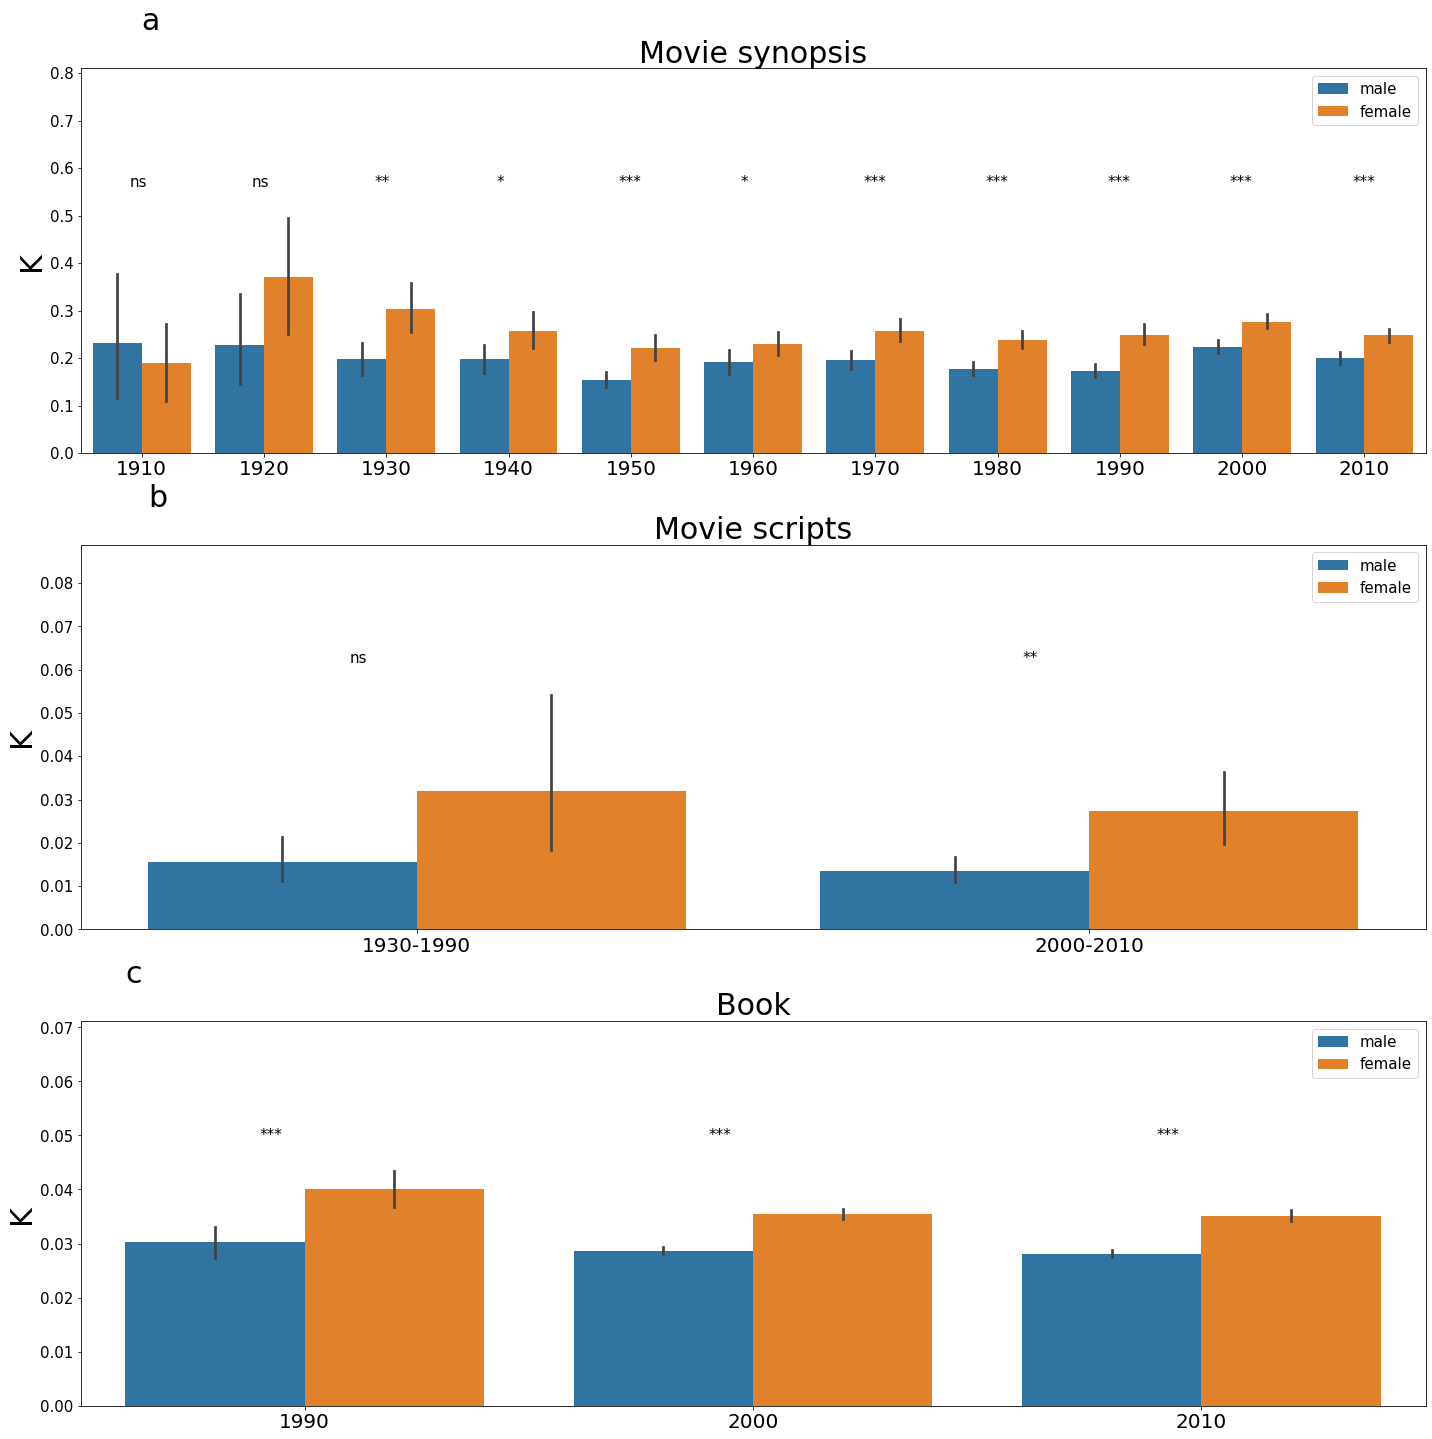

In [89]:
# sns.set_style("white")
f, axes = plt.subplots(3,1,figsize=(20, 20))
ax=axes[0]
c=a[a['gender']=='female'].groupby(['genres'])['K'].mean().keys()
d=a[a['gender']=='female'].groupby(['genres'])['K'].mean().values
e=[i[0] for i in sorted(list(zip(c,d)),key=lambda x: x[0],reverse=False)]
sns.catplot(x="genres", y="K", hue="gender", data=a,
                height=10,aspect=30/10, kind="bar", palette=None,order=e,
            ax=ax)
style="whitegrid"
plt.setp(axes[0].get_xticklabels(),rotation=0) 
ax.legend_.remove()
# ax.legend(loc='upper left')
ax.xaxis.set_tick_params(labelsize=20)
ax.set_title('Movie synopsis',fontsize=30)
ax.set_xlabel(None)
ax.set_ylabel('K',fontsize=30)
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
for n,i in enumerate(e):
    m=a[(a['gender']=='male')&(a['genres']==i)]['K'].values
    f=a[(a['gender']=='female')&(a['genres']==i)]['K'].values
    v,p=stats.ttest_ind([i for i in m], [i for i in f])
    ax.text(n-0.1,b,sig(p),fontsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylim([0,ax.get_ylim()[1]*1.3])
ax.legend(loc='upper right',fontsize=15)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*1.1
ax.text(0,b,'a',fontsize=30)
plt.close()

ax=axes[1]
c=a1[a1['gender']=='female'].groupby(['genres'])['K'].mean().keys()
d=a1[a1['gender']=='female'].groupby(['genres'])['K'].mean().values
e=[i[0] for i in sorted(list(zip(c,d)),key=lambda x: x[0],reverse=False)]
sns.catplot(x="genres", y="K", hue="gender", data=a1,
                height=10,aspect=30/10, kind="bar", palette=None,order=e,
            ax=axes[1])
style="whitegrid"
ax.xaxis.set_tick_params(labelsize=20)
ax.set_xticklabels(['1930-1990','2000-2010'])

plt.setp(axes[1].get_xticklabels(),rotation=0) 

# ax.legend(loc='upper left')
ax.legend(bbox_to_anchor=(1.1, 0.5),fontsize=15)
ax.set_title('Movie scripts',fontsize=30)
ax.set_xlabel(None)
ax.set_ylabel('K',fontsize=30)
# ax.text(0,0.4,'b',fontsize=30)
# for n,i in enumerate(e):
#     m=a1[(a1['gender']=='male')&(a1['genres']==i)]['K'].values
#     f=a1[(a1['gender']=='female')&(a1['genres']==i)]['K'].values
#     v,p=stats.ttest_ind([i for i in m], [i for i in f])
#     ax.text(n,0.3,sig(p))
# plt.close()
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
for n,i in enumerate(e):
    m=a1[(a1['gender']=='male')&(a1['genres']==i)]['K'].values
    f=a1[(a1['gender']=='female')&(a1['genres']==i)]['K'].values
    v,p=stats.ttest_ind([i for i in m], [i for i in f])
    ax.text(n-0.1,b,sig(p),fontsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylim([0,ax.get_ylim()[1]*1.3])
ax.legend(loc='upper right',fontsize=15)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*1.1
ax.text(-0.4,b,'b',fontsize=30)
plt.close()

ax=axes[2]
c=a2[a2['gender']=='female'].groupby(['genres'])['K'].mean().keys()
d=a2[a2['gender']=='female'].groupby(['genres'])['K'].mean().values
e=[i[0] for i in sorted(list(zip(c,d)),key=lambda x: x[0],reverse=False)]
sns.catplot(x="genres", y="K", hue="gender", data=a2,
                height=10,aspect=30/10, kind="bar", palette=None,order=e,
           ax=axes[2])
ax.set_title('Book',fontsize=30)
style="whitegrid"
ax.legend_.remove()
# ax.legend(loc='upper left')
ax.xaxis.set_tick_params(labelsize=20)
ax.set_xlabel(None)
ax.set_ylabel('K',fontsize=30)
plt.setp(ax.get_xticklabels(),rotation=0)
# ax.text(-0.4,0.042,'c',fontsize=30)
# for n,i in enumerate(e):
#     m=a2[(a2['gender']=='male')&(a2['genres']==i)]['K'].values
#     f=a2[(a2['gender']=='female')&(a2['genres']==i)]['K'].values
#     v,p=stats.ttest_ind([i for i in m], [i for i in f])
#     ax.text(n,0.03,sig(p))
    
# plt.close()
ax.set_ylim([0,ax.get_ylim()[1]*1.2])
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*0.9
for n,i in enumerate(e):
    m=a2[(a2['gender']=='male')&(a2['genres']==i)]['K'].values
    f=a2[(a2['gender']=='female')&(a2['genres']==i)]['K'].values
    v,p=stats.ttest_ind([i for i in m], [i for i in f])
    ax.text(n-0.1,b,sig(p),fontsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.set_ylim([0,ax.get_ylim()[1]*1.3])
ax.legend(loc='upper right',fontsize=15)
b=ax.get_ylim()[0]+(ax.get_ylim()[1]-ax.get_ylim()[0])*1.1
ax.text(-0.4,b,'c',fontsize=30)
plt.close()
plt.tight_layout()
plt.savefig('./picture/figure13.eps',dpi=300)
plt.show()

In [14]:
c=a[a['gender']=='female'].groupby(['genres'])['K'].mean().keys()
d=a[a['gender']=='female'].groupby(['genres'])['K'].mean().values
e=[i[0] for i in sorted(list(zip(c,d)),key=lambda x: x[0],reverse=False)]
for i in e:
    m=a[(a['gender']=='male')&(a['genres']==i)]['K'].values
    f=a[(a['gender']=='female')&(a['genres']==i)]['K'].values
    v,p=stats.ttest_ind([i for i in m], [i for i in f])
    print(i,p)

1910 0.6223139347142157
1920 0.08677691028230951
1930 0.0010382488215655158
1940 0.01682883182743913
1950 2.3500130981706328e-05
1960 0.03138532377537458
1970 8.288714735372655e-05
1980 8.198331588849511e-07
1990 1.895836390780958e-09
2000 4.939034619603787e-07
2010 5.275559278734792e-07


In [194]:
c=a1[a1['gender']=='female'].groupby(['genres'])['K'].mean().keys()
d=a1[a1['gender']=='female'].groupby(['genres'])['K'].mean().values
e=[i[0] for i in sorted(list(zip(c,d)),key=lambda x: x[0],reverse=False)]
for i in e:
    m=a1[(a1['gender']=='male')&(a1['genres']==i)]['K'].values
    f=a1[(a1['gender']=='female')&(a1['genres']==i)]['K'].values
    v,p=stats.ttest_ind([i for i in m], [i for i in f])
    print(i,p)

1930 0.8029311302749933
1940 0.7350022390705532
1950 0.7023694873977019
1960 0.6301295296688088
1970 0.33548593366645485
1980 0.12494239167576188
1990 0.24176981354888755
2000 0.03233887791690473
2010 0.11622533765870133


In [76]:
c=a2[a2['gender']=='female'].groupby(['genres'])['K'].mean().keys()
d=a2[a2['gender']=='female'].groupby(['genres'])['K'].mean().values
e=[i[0] for i in sorted(list(zip(c,d)),key=lambda x: x[0],reverse=False)]
for i in e:
    m=a2[(a2['gender']=='male')&(a2['genres']==i)]['K'].values
    f=a2[(a2['gender']=='female')&(a2['genres']==i)]['K'].values
    v,p=stats.ttest_ind([i for i in m], [i for i in f])
    print(i,p)

1990 3.0380567031629225e-05
2000 4.393029479143284e-33
2010 5.572488098906552e-31
